# Home Credit Default Risk, Baseline Model
## 1. Data Preparation


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('max_columns', 1000)

In [2]:
application = pd.read_csv('all/application_train.csv')

In [3]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
from sklearn import preprocessing

col_categorical = [col for col in application.columns if application[col].dtype == 'object']

for col in col_categorical:
    le = preprocessing.LabelEncoder()
    le.fit(list(application[col].values.astype('str')))
    application[col] = le.transform(list(application[col].values.astype('str')))

In [5]:
summary_describe = application.describe()
col_missing = summary_describe.columns[summary_describe.loc['count',:] < application.shape[0]]

In [6]:
summary_describe[col_missing].loc[['min','max'],:].T

,min,max
AMT_ANNUITY,1.615500e+03,2.580255e+05
AMT_GOODS_PRICE,4.050000e+04,4.050000e+06
OWN_CAR_AGE,0.000000e+00,9.100000e+01
CNT_FAM_MEMBERS,1.000000e+00,2.000000e+01
EXT_SOURCE_1,1.456813e-02,9.626928e-01
EXT_SOURCE_2,8.173617e-08,8.549997e-01
EXT_SOURCE_3,5.272652e-04,8.960095e-01
APARTMENTS_AVG,0.000000e+00,1.000000e+00
BASEMENTAREA_AVG,0.000000e+00,1.000000e+00
YEARS_BEGINEXPLUATATION_AVG,0.000000e+00,1.000000e+00


In [7]:
application.fillna(-9999, inplace = True)

## 2. Modeling

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc, average_precision_score, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score

import seaborn as sns
from time import time

In [9]:
X = application.drop('TARGET', axis=1) 
Y = application['TARGET']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123, stratify=Y)

In [10]:
X_train.shape

(246008, 121)

In [11]:
Y_train.mean()

0.08072908198107379

In [12]:
Y_test.mean()

0.08072776937710356

### 2.1 Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
ind_params = { 
    'random_state':0, 
    'n_jobs': -1
}

cv_params = {
    'penalty': ['l1'],
    'class_weight':[{0:0.1,1:0.9}],
    'max_iter': [300]
}

kfold = StratifiedKFold(5)

In [ ]:
clf_lr = GridSearchCV(LogisticRegression(**ind_params),cv_params,cv=kfold,scoring='f1')
clf_lr.fit(X_train,Y_train)

In [ ]:
pd.DataFrame(clf_lr.cv_results_)

In [ ]:
best_estimator_lr = clf_lr.best_estimator_
best_estimator_lr

### 2.2 Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
ind_params = { 
    'n_jobs':-1,
    'random_state':0
}

cv_params = {
    'n_estimators': [200],
    'class_weight':[{0:0.1,1:0.9}, {0:0.2,1:0.8}],
    'max_depth':[5,7]
}

kfold = StratifiedKFold(5)

In [18]:
clf_rf = GridSearchCV(RandomForestClassifier(**ind_params),cv_params,cv=kfold,scoring='f1')
clf_rf.fit(X_train,Y_train)

/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Wanti

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200], 'class_weight': [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8}], 'max_depth': [5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [19]:
pd.DataFrame(clf_rf.cv_results_)

/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwa

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.776014,0.262999,0.354580,0.055211,"{0: 0.1, 1: 0.9}",5,200,"{'class_weight': {0: 0.1, 1: 0.9}, 'max_depth'...",0.266054,0.257435,0.270577,0.261676,0.261173,0.263383,0.004518,2,0.269384,0.270189,0.270012,0.272810,0.271832,0.270845,0.001272
1,16.519579,0.628955,0.388340,0.003146,"{0: 0.1, 1: 0.9}",7,200,"{'class_weight': {0: 0.1, 1: 0.9}, 'max_depth'...",0.270250,0.265811,0.273342,0.267315,0.267169,0.268777,0.002703,1,0.285929,0.284998,0.285462,0.286163,0.286705,0.285851,0.000585
2,12.486022,0.789899,0.333187,0.058166,"{0: 0.2, 1: 0.8}",5,200,"{'class_weight': {0: 0.2, 1: 0.8}, 'max_depth'...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,16.486135,0.401199,0.415546,0.045578,"{0: 0.2, 1: 0.8}",7,200,"{'class_weight': {0: 0.2, 1: 0.8}, 'max_depth'...",0.023961,0.020568,0.019724,0.025509,0.016778,0.021308,0.003107,3,0.025223,0.027761,0.021402,0.025467,0.022752,0.024521,0.002224


In [20]:
best_estimator_rf = clf_rf.best_estimator_
best_estimator_rf

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=7, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

### 2.3 XGB

In [21]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
ind_params = { 
    'seed':0, 
    'scale_pos_weight': 1,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'base_score': Y_train.mean()
}

cv_params = {
    'n_estimators': [200],
    'max_depth':[5],
    'max_delta_step':[0,2],
    'learning_rate': [0.1,0.2,0.3] 
}

kfold = StratifiedKFold(5)

In [26]:
clf_xgb = GridSearchCV(xgb.XGBClassifier(**ind_params),cv_params,cv=kfold,scoring='f1')
clf_xgb.fit(X_train,Y_train)

/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: Deprecatio

/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: Deprecatio

/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: Deprecatio

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.08072908198107379, colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       nthread=-1, objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200], 'max_depth': [5], 'max_delta_step': [0, 2], 'learning_rate': [0.1, 0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [27]:
pd.DataFrame(clf_xgb.cv_results_)

/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwa

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_delta_step,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,51.744682,0.840702,0.345921,0.021498,0.1,0,5,200,"{'learning_rate': 0.1, 'max_delta_step': 0, 'm...",0.040242,0.044552,0.043679,0.037763,0.034994,0.040246,0.003580,5,0.059509,0.061481,0.055492,0.066414,0.063855,0.061350,0.003732
1,51.612994,0.582858,0.355462,0.024113,0.1,2,5,200,"{'learning_rate': 0.1, 'max_delta_step': 2, 'm...",0.044046,0.039349,0.035618,0.037333,0.032588,0.037787,0.003836,6,0.057554,0.058945,0.053897,0.061917,0.061490,0.058760,0.002918
2,49.449763,0.229751,0.346128,0.012978,0.2,0,5,200,"{'learning_rate': 0.2, 'max_delta_step': 0, 'm...",0.057075,0.060764,0.053964,0.054515,0.053410,0.055946,0.002717,3,0.108200,0.106706,0.103164,0.111540,0.107709,0.107464,0.002694
3,50.671356,0.307696,0.341280,0.010225,0.2,2,5,200,"{'learning_rate': 0.2, 'max_delta_step': 2, 'm...",0.057646,0.054814,0.048968,0.045845,0.050669,0.051589,0.004191,4,0.098661,0.103241,0.098446,0.104861,0.101999,0.101441,0.002528
4,49.497964,0.125883,0.334799,0.009407,0.3,0,5,200,"{'learning_rate': 0.3, 'max_delta_step': 0, 'm...",0.071228,0.068177,0.063252,0.066108,0.065222,0.066797,0.002722,1,0.159327,0.162393,0.152852,0.160128,0.157478,0.158435,0.003207
5,51.149282,0.620890,0.338327,0.019575,0.3,2,5,200,"{'learning_rate': 0.3, 'max_delta_step': 2, 'm...",0.064244,0.066151,0.064136,0.051728,0.056026,0.060457,0.005588,2,0.154936,0.159420,0.148513,0.152309,0.162267,0.155489,0.004909


In [28]:
best_estimator_xgb = clf_xgb.best_estimator_
best_estimator_xgb

XGBClassifier(base_score=0.08072908198107379, colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=200,
       nthread=-1, objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

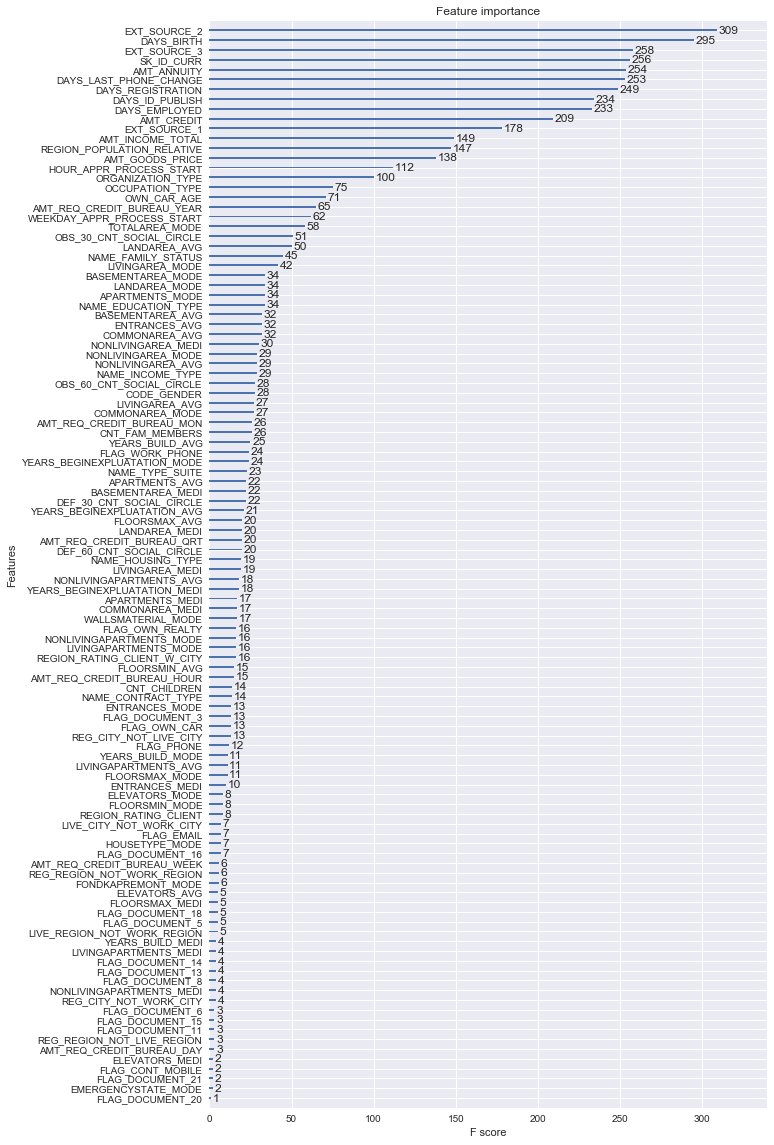

In [29]:
fig, ax = plt.subplots(figsize=(10,20))
xgb.plot_importance(best_estimator_xgb, ax)

## 3. Final Model & Model Evaluation
### 3.1 Training and scoring

In [30]:
# final_lr = best_estimator_lr.fit(X_train, Y_train)
final_rf = best_estimator_rf.fit(X_train, Y_train)
final_xgb = best_estimator_xgb.fit(X_train, Y_train)

In [31]:
# pred_lr = final_lr.predict(X_test)
pred_rf = final_rf.predict(X_test)
pred_xgb = final_xgb.predict(X_test)

/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### 3.2 Confusion matrix

In [32]:
# print('Confusion Matrix (LR):')

# df_cm = pd.DataFrame(confusion_matrix(Y_test, pred_lr))
# fig, ax = plt.subplots(figsize=(10,8))
# sns.heatmap(df_cm, annot=True, fmt="d", ax=ax)
# ax.set_ylabel('True label');
# ax.set_xlabel('Predicted label');

Confusion Matrix (RF):


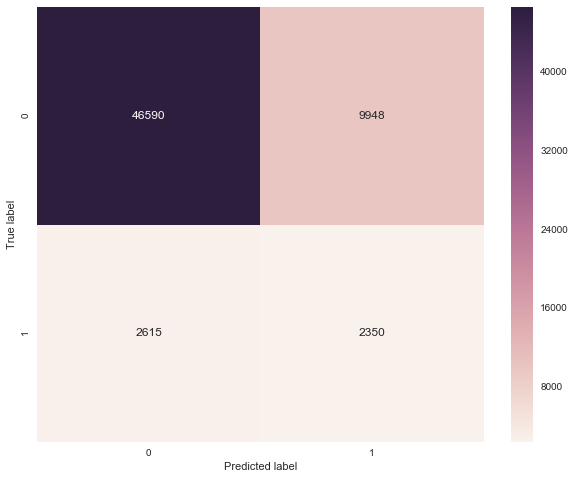

In [33]:
print('Confusion Matrix (RF):')

df_cm = pd.DataFrame(confusion_matrix(Y_test, pred_rf))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_cm, annot=True, fmt="d", ax=ax)
ax.set_ylabel('True label');
ax.set_xlabel('Predicted label');

Confusion Matrix (XGB):


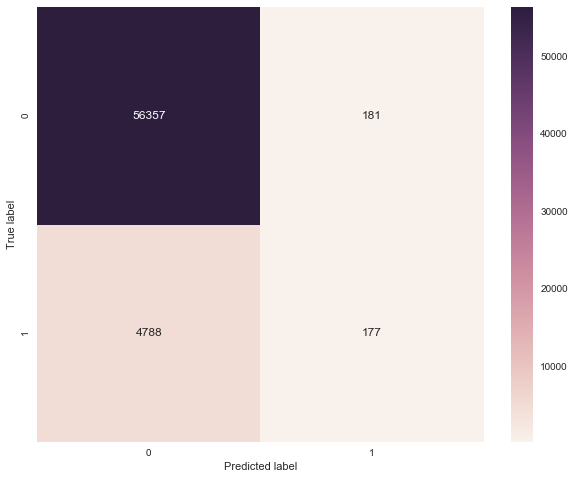

In [34]:
print('Confusion Matrix (XGB):')

df_cm = pd.DataFrame(confusion_matrix(Y_test, pred_xgb))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_cm, annot=True, fmt="d", ax=ax)
ax.set_ylabel('True label');
ax.set_xlabel('Predicted label');

### 3.3 ROC & PR

In [37]:
# # Logistic Regression
# prob_lr = pd.DataFrame(list(final_lr.predict_proba(X_test)))
# fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, prob_lr.iloc[:,1])
# roc_auc_lr = auc(fpr_lr, tpr_lr)
# p_lr,r_lr,thre_lr = precision_recall_curve(y_test, prob_lr.iloc[:,1])
# average_p_lr = average_precision_score(y_test, prob_lr.iloc[:,1])

# Random Forest
prob_rf = pd.DataFrame(list(final_rf.predict_proba(X_test)))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, prob_rf.iloc[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
p_rf,r_rf,thre_rf = precision_recall_curve(Y_test,prob_rf.iloc[:,1])
average_p_rf = average_precision_score(Y_test, prob_rf.iloc[:,1])

# xgboost
prob_xgb = pd.DataFrame(list(final_xgb.predict_proba(X_test)))
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(Y_test, prob_xgb.iloc[:,1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
p_xgb,r_xgb,thre_xgb = precision_recall_curve(Y_test,prob_xgb.iloc[:,1])
average_p_xgb = average_precision_score(Y_test, prob_xgb.iloc[:,1])

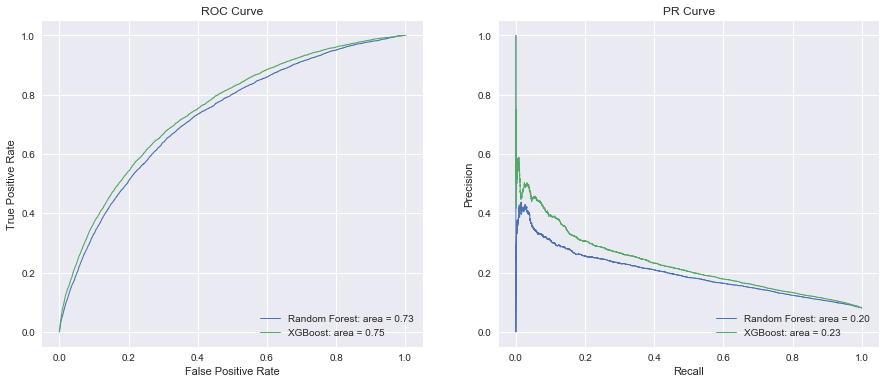

In [38]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('PR Curve')

# ax1.plot(fpr_lr, tpr_lr, lw=1, label='LR: area = %0.2f'%roc_auc_lr)
ax1.plot(fpr_rf, tpr_rf, lw=1, label='Random Forest: area = %0.2f'%roc_auc_rf)
ax1.plot(fpr_xgb, tpr_xgb, lw=1, label='XGBoost: area = %0.2f'%roc_auc_xgb)

# ax2.plot(r_lr, p_lr, lw=1, label='LR: area = %0.2f'%average_p_lr)
ax2.plot(r_rf, p_rf, lw=1, label='Random Forest: area = %0.2f'%average_p_rf)
ax2.plot(r_xgb, p_xgb, lw=1, label='XGBoost: area = %0.2f'%average_p_xgb)

ax1.legend(loc='lower right')    
ax2.legend(loc='lower right')

plt.show()

### 3.4 Performance comparison

In [40]:
# calculate accuracy for logistic regression
# score_lr = final_lr.score(X_test, y_test)

# calculate accuracy for random forest
score_rf = final_rf.score(X_test, Y_test)

# calculate accuracy for xgboost
score_xgb = final_xgb.score(X_test, Y_test)

/Users/Wanting.Wang@ibm.com/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [42]:
score_lr = 0
roc_auc_lr = 0
average_p_lr = 0

result = {'Model':['Logistic Regression', 'Random Forest', 'XGBoost'],
          'Binary Accuracy':[score_lr, score_rf, score_xgb],
          'AUC of ROC':[roc_auc_lr, roc_auc_rf, roc_auc_xgb],
          'AUC of PR':[average_p_lr, average_p_rf, average_p_xgb]}
pd.DataFrame(result,columns=['Model', 'Binary Accuracy', 'AUC of ROC', 'AUC of PR'])

,Model,Binary Accuracy,AUC of ROC,AUC of PR
0,Logistic Regression,0.000000,0.000000,0.000000
1,Random Forest,0.795734,0.725910,0.197347
2,XGBoost,0.919207,0.747373,0.228378
